<h1>Eksploracja Danych 2022 - Projekt</h1>

<h3>Autorzy: K. Jarek, P. Witek</h3>
<h3>Zbiór: "Concrete Data"</h3>
<p></p>
<a href="https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength">Link do zbioru danych</a>

<h3>Hipotezy:</h3>
<ol>
<li>Im wyższa wartość czynnika Cement i Superplasticizer oraz im więcej dni mineło od wylania betonu (im wyższa wartość Age) tym wyższą wartość będzie miał Concrete compressive strength (wytrzymałość na ściskanie).</li>
<li>Im wyższa wartość czynnika Fine Aggregate, Fly Ash i Blast Furnace Slag tym wyższą wartość będzie miał Concrete compressive strength.</li>
<li>Im mniejsza wartośc czynnika Water i Fine Aggregate oraz im więcej cementu (Cement) tym wyższą wartość będzie miał Concrete compressive strength.</li>
</ol>

<h2>Analiza statystyczna (Statistical analisys)</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_excel ("Concrete_Data.xls")

In [4]:
df.head(20)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
                   'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate', 
                   'Age (day)': 'Age',
                   'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength'},
                   inplace=True)
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [6]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [7]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [8]:
df.shape

(1030, 9)

In [9]:
df.drop_duplicates(inplace=True)
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [10]:
df.reset_index(inplace=True,drop=True)

In [11]:
print('Shape:', df.shape)
df.tail()

Shape: (1005, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1004,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [12]:
df.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [13]:
df.median()

Cement                           265.000000
Blast Furnace Slag                20.000000
Fly Ash                            0.000000
Water                            185.700000
Superplasticizer                   6.100000
Coarse Aggregate                 968.000000
Fine Aggregate                   780.000000
Age                               28.000000
Concrete compressive strength     33.798114
dtype: float64

In [14]:
df.mode()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,251.37,0.0,0.0,192.0,0.0,932.0,594.0,28,31.350474


In [15]:
df.var()

Cement                           10887.879601
Blast Furnace Slag                7425.364576
Fly Ash                           4122.596436
Water                              455.427169
Superplasticizer                    35.041179
Coarse Aggregate                  6018.584052
Fine Aggregate                    6454.491667
Age                               4062.110923
Concrete compressive strength      265.194960
dtype: float64

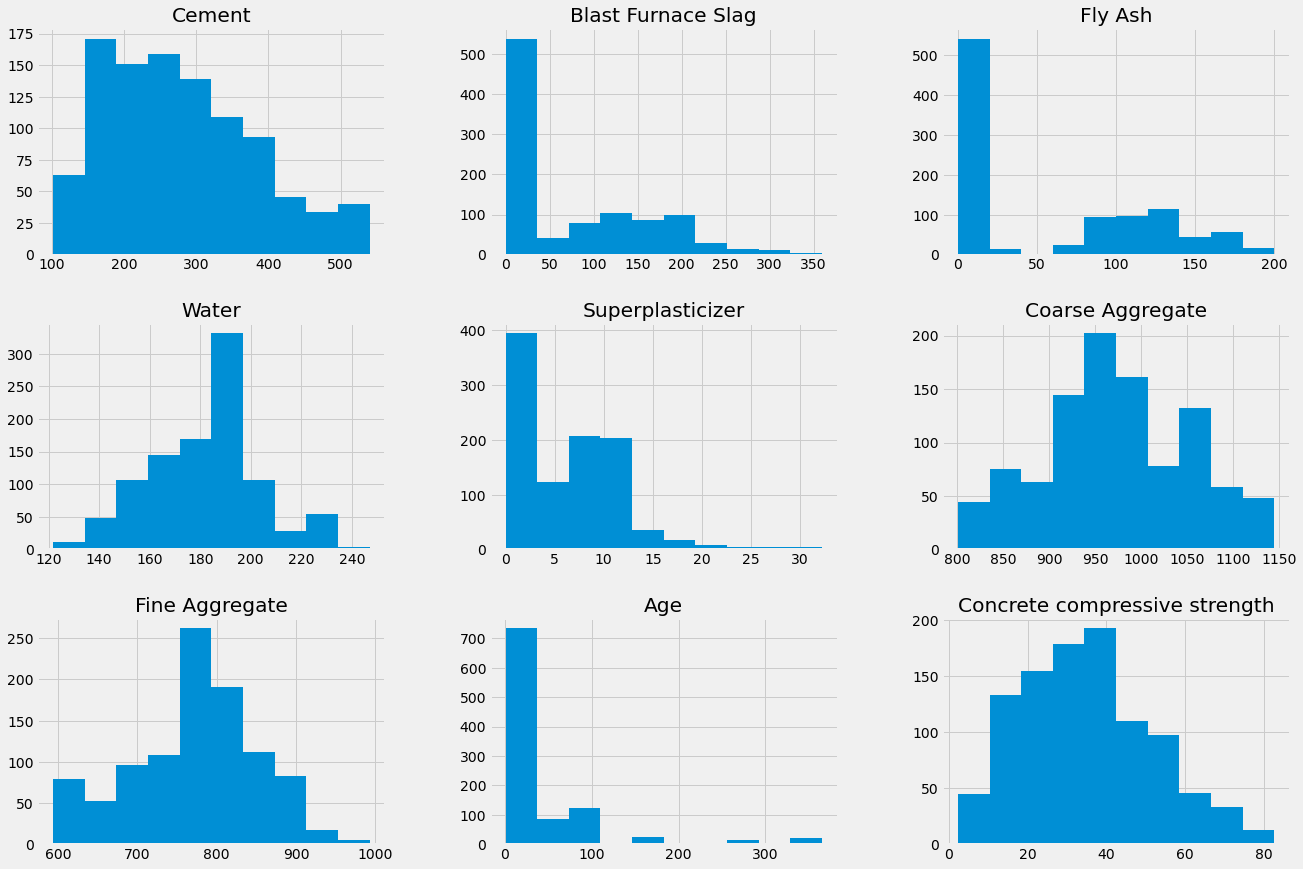

In [16]:
plt.rcParams['figure.figsize'] = [20, 14]
hist = df.hist()

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
formula  = "Q('Concrete compressive strength') ~ Cement + Q('Blast Furnace Slag') + Q('Fly Ash')"
formula += " + Water + Superplasticizer + Q('Coarse Aggregate') + Q('Fine Aggregate') + Age"

anova_model = smf.ols(formula=formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

In [ ]:
anova_model.summary()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
chisquare_stats = stats.chisquare(df, f_exp=None, ddof=0, axis=0)
print('Statystyka:', chisquare_stats.statistic, '\np-value:', chisquare_stats.pvalue)

In [ ]:
df.loc[:, df.columns != 'Coarse Aggregate'].boxplot(rot=30, figsize=(12, 8))

In [ ]:
# normality test
shapiro_stat, shapiro_p = stats.shapiro(df[:-1])
print('Statystyka: %f, p-value: %f' % (shapiro_stat, shapiro_p))

In [ ]:
plt.plot(df['Cement'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Cement [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Cement/Concrete compressive strength')

plt.show()

In [ ]:
plt.plot(df['Age'], df['Concrete compressive strength'], 'go')
plt.xlabel('Age [day]')
plt.ylabel('Concrete compressive strength [MPA]')
plt.title('Age/Concrete compressive strength')

plt.show()

In [ ]:
plt.plot(df['Superplasticizer'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Superplasticizer [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Superplasticizer/Concrete compressive strength')

plt.show()

<ul>
<li>Predyktory Cement i Superplasticizer są pozytywnie skorelowane z Concrete compressive strength, co potwierdza hipotezę nr 1 i 3.</li>
<li>Predyktory Water i Fine Aggregate są negatywnie skorelowane z Concrete compressive strength, co potwierdza hipotezę nr 3 i falsyfikuje hipotezę nr 2.</li>
<li>Predyktory Blast Furnace i Fly Ash nie wykazują korelacji z Concrete compressive strength, co falsyfikuje hipotezę nr 2.</li>
<li>Cement ma najsilniejszy wpływ na Concrete compressive strength.</li>
<li>Zmienne objaśniające są ze sobą słabo skorelowane.</li>
<li>Jednoznacznie trudna jest do określenia zależność danych występująca w ramach zbioru danych. Dla większości zmienych nie da się określeić jej jako liniowej, natomiast dla Cementu pojawia się lionowa rosnąca zależność.</li>
</ul>

<h2>Decision Tree Classifier</h2>

In [22]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [23]:
#Utworzenie zmiennych oraz wartości (train, test)
X = df.loc[:, df.columns != 'Concrete compressive strength']
y = df['Concrete compressive strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#Parametry drzewa regresyjnego
dt = DecisionTreeRegressor(min_samples_leaf=0.035, random_state=2)
dt = dt.fit(X, y)
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.035,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2,
 'splitter': 'best'}

In [25]:
#Wartości przewidywane dla zmiennych testowych
tree_predictions = dt.predict(X_test)
tree_predictions

array([46.9038388 , 46.65087442, 20.43707585, 33.58741673, 32.62452195,
       24.07132153, 35.04133878, 35.04133878, 46.9038388 , 33.58741673,
       35.04133878, 10.94206178, 55.49065003, 27.53028999, 55.49065003,
       46.65087442, 65.82922257, 27.78806009, 65.82922257, 35.04133878,
       20.43707585, 27.78806009, 10.94206178, 20.43707585, 20.43707585,
       20.43707585, 37.44360952, 15.60173106, 65.82922257, 35.04133878,
       39.52880486, 46.65087442, 20.43707585, 39.52880486, 33.58741673,
       10.94206178, 32.62452195, 46.9038388 , 10.94206178, 15.60173106,
       14.95611339, 24.07132153, 14.95611339, 37.44360952, 24.07132153,
       37.44360952, 27.78806009, 27.91922801, 55.49065003, 10.94206178,
       32.62452195, 27.78806009, 14.95611339, 27.53028999, 37.44360952,
       27.91922801, 55.49065003, 35.04133878, 27.53028999, 24.07132153,
       46.9038388 , 37.44360952, 27.53028999, 27.78806009, 27.91922801,
       27.53028999, 10.94206178, 32.62452195, 10.94206178, 65.82

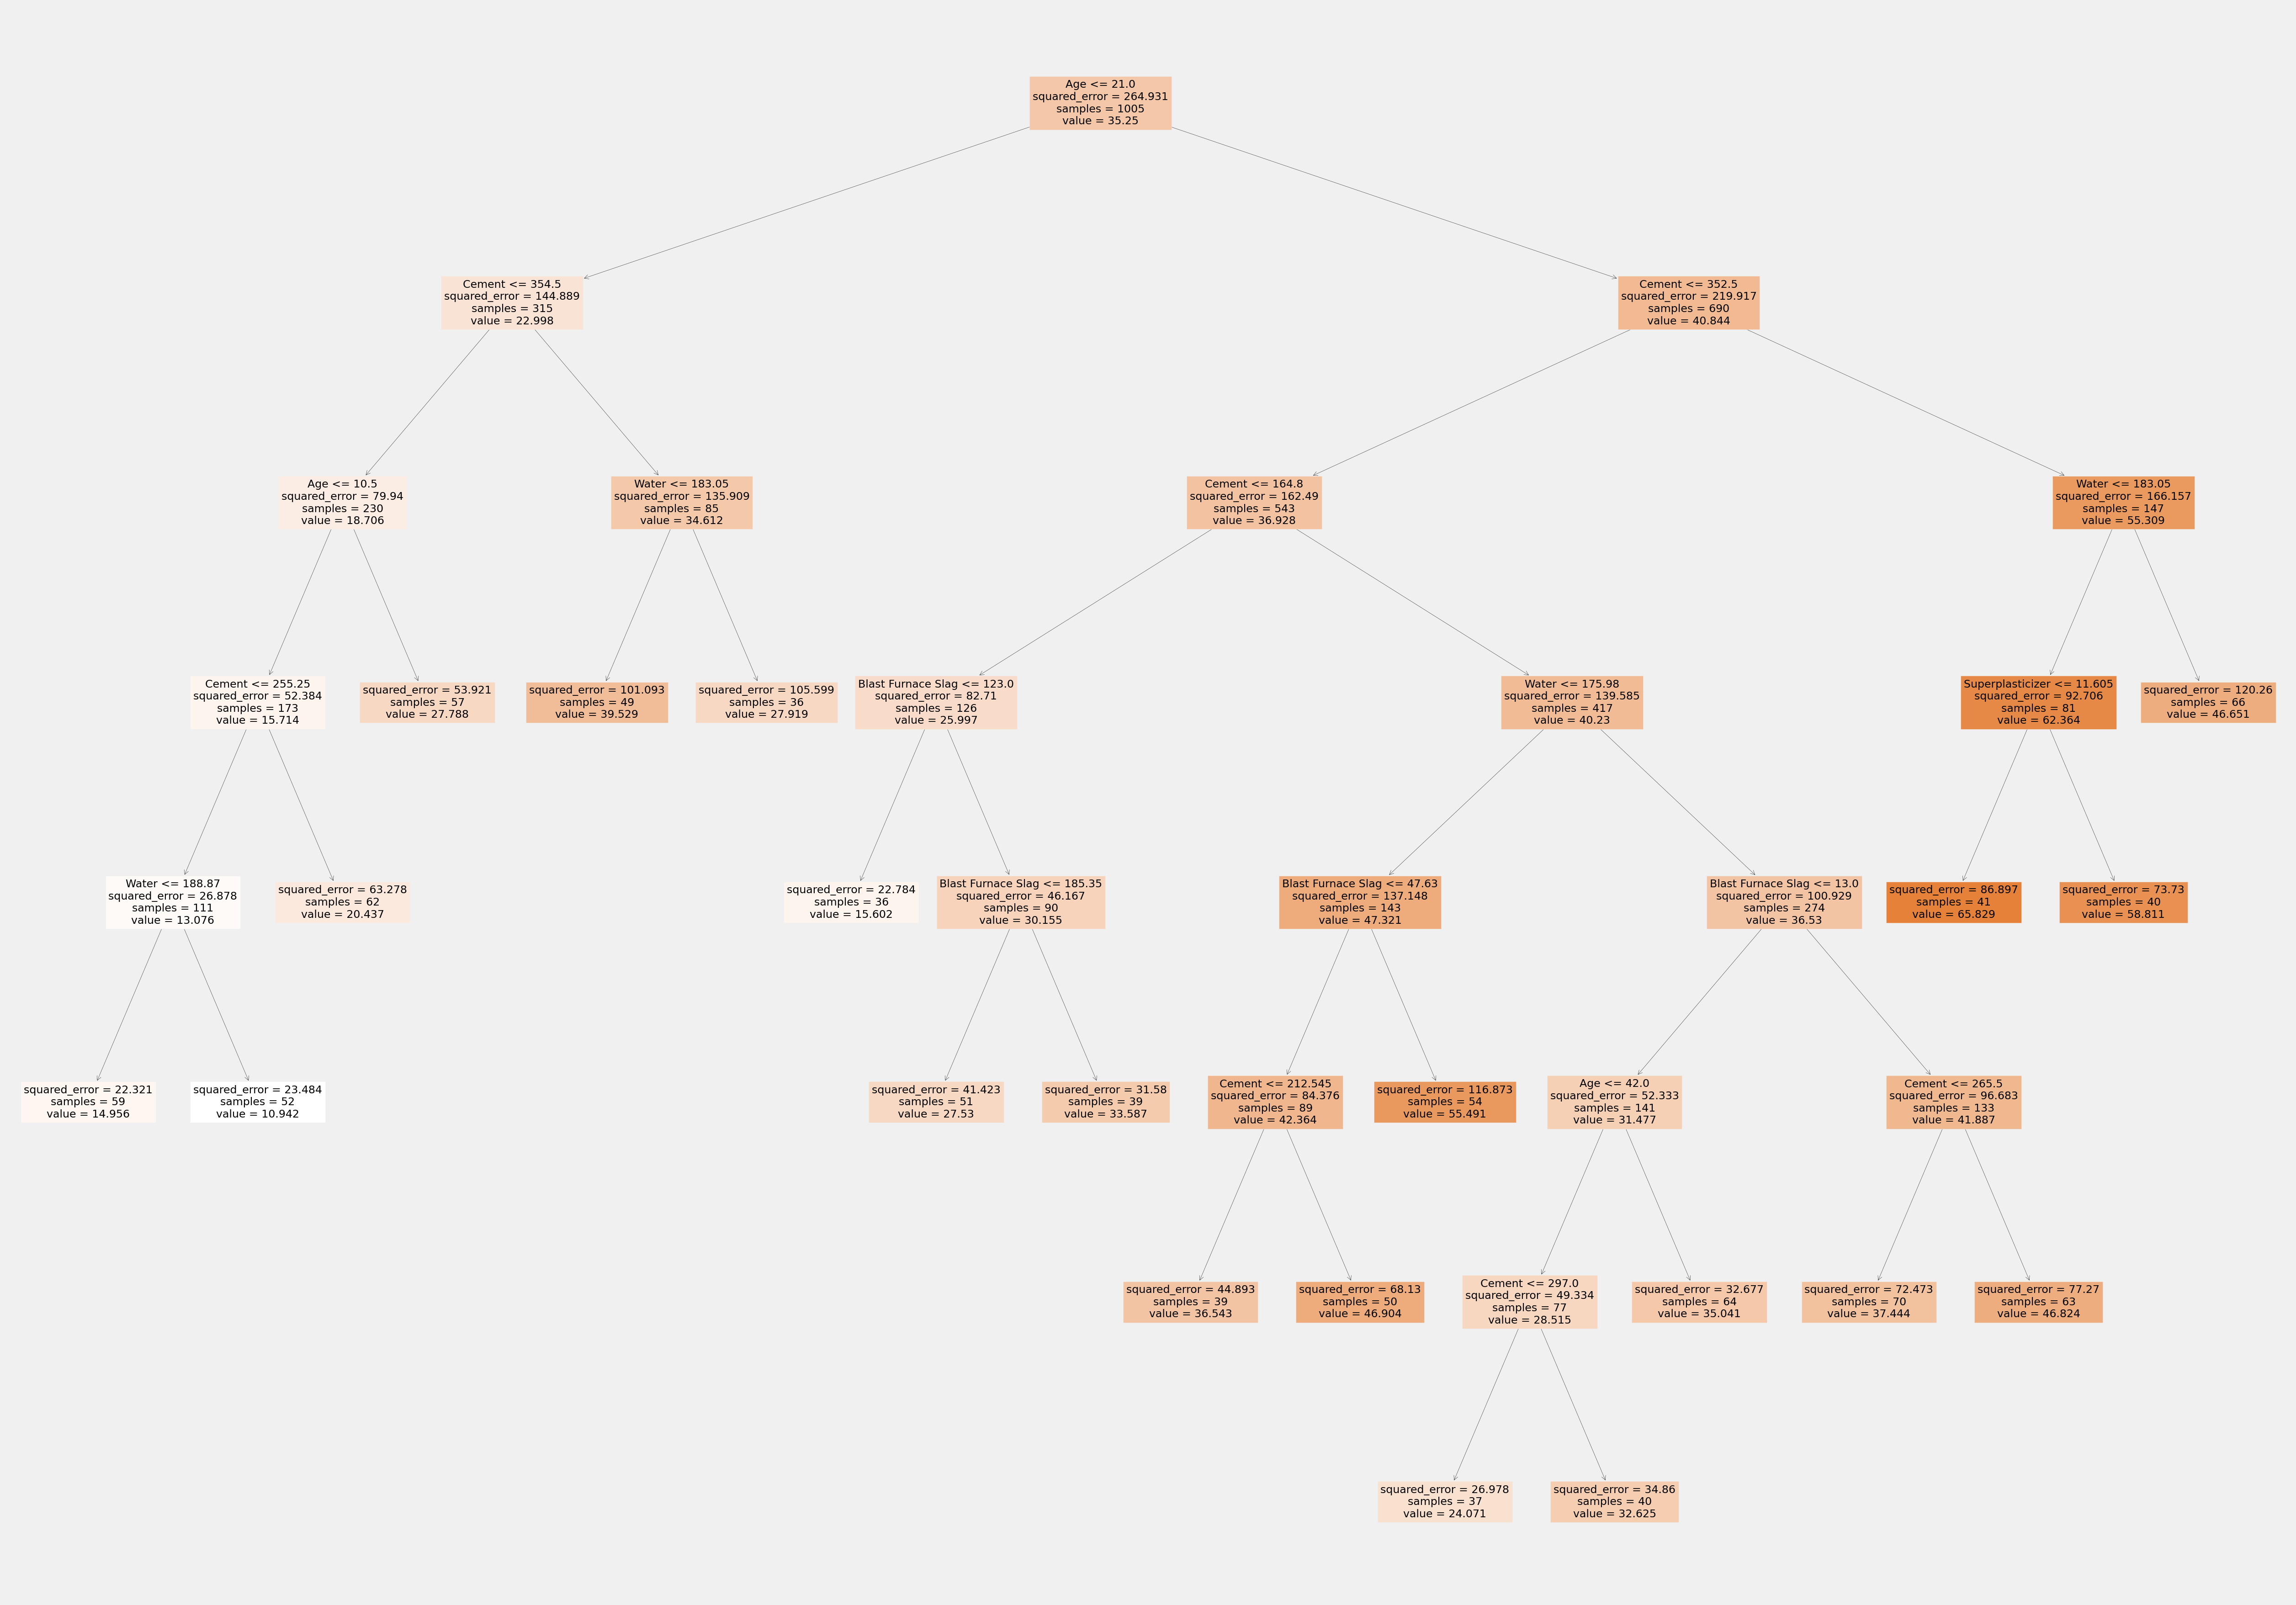

In [26]:
#Wykres drzewa regresyjnego
plt.figure(figsize=(80,60))
plot_tree(dt,filled=True,feature_names=df.columns)
plt.show()

In [27]:
#Błąd R^2 Dla drzewa regresyjnego
r_square = metrics.r2_score(y_test, tree_predictions)
print("R-Square Error associated with Decision Tree Regression is:", r_square)

R-Square Error associated with Decision Tree Regression is: 0.7921501100011814


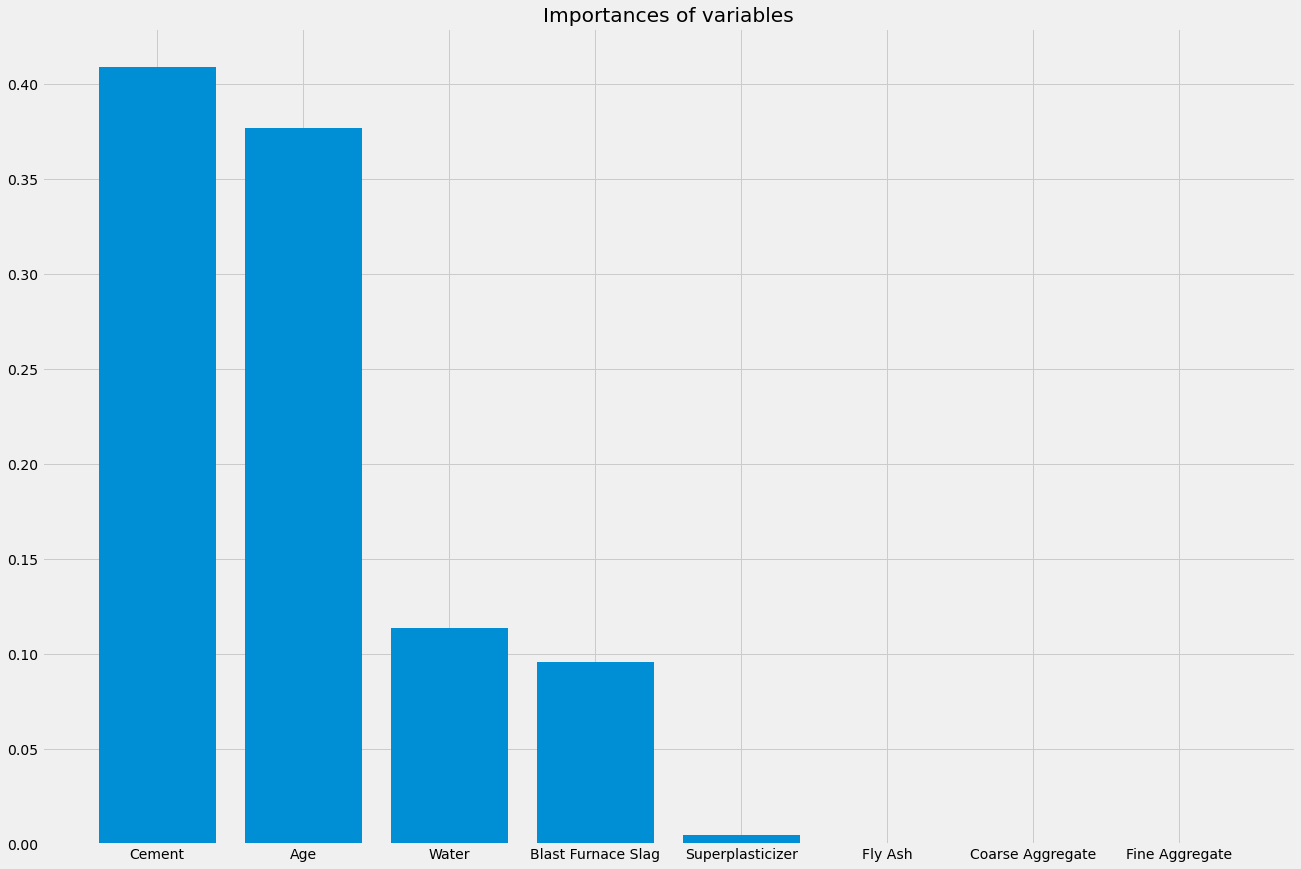

In [28]:
#Wykres ważności zmiennych
dt.feature_importances_
importances_df = pd.DataFrame(
                    {'Feature_names': X.columns, 'Importances': dt.feature_importances_}
                    ).sort_values(by='Importances',ascending=False)
plt.bar(importances_df['Feature_names'],importances_df['Importances'])
plt.title("Importances of variables")
plt.show()

<h3> Reguły oparte na drzewie klasyfikacynym dla najbardziej wyrazistych klas:</h3>
<ul>
<li>Cement mający powyżej 21 dni oraz zawierający powyżej 355.5 Concrete i zawierający wody w przedziale <155.5 ; 183> ma wysoką wytrzymałość na średnim poziome 66.124 MPa</li>
<li>Cement mający powyżej 21 dni oraz zawierający Concrete w przedziale <164.8; 355.5> oraz powyżej 162.7 Blast Furnance Slag ma wytrzymałość o średnim poziomie 19.312 MPa</li>
<li>Cement mający więcej niż 21 dni ale nie mniej niz 5 dni oraz zawierający mniej niż 354.5 Concrete i zawierający mniej niż 7.85 Superplasticizer  ma niską wytrzymałość na średnim poziome 12.032 MPa</li>

</ul>

<h1>#TODO</h1>
<b>koszt resubstytucji + ewentualna wariancja w liściach, obecnie jest policzony współczynnik determinacji dla każdego liścia (może wsytarczy w zamian za wariancje)
++ Na razie mamy hipotezy oparte tylko o jedną zmienną decyzyjną (Wytrzymałość na ściskanie). Jeśli prof. Regulski będzie chciał hipotezy oparte każda o inną zmienną decyzyjną, wtedy trzeba będzie wygenerować drzewo pod każdą hipotezę i do każdego drzewa wypisać reguły dla liści o najmniejszym współczynniku determinacji. </b>



<h2>Analiza skupień (Clustering)</h2>

In [29]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from skstab import StadionEstimator
from matplotlib.colors import LogNorm

ImportError: cannot import name 'StadionEstimator' from 'skstab' (unknown location)

<blockquote>By skorzystać z pakietu <b>skstab</b> konieczne jest wykorzsytanie komendy:<br>
<code>python3 setup.py install</code>
</blockquote>

In [30]:
feature_1 = 'Cement'
feature_2 = 'Superplasticizer'
feature_3 = 'Concrete compressive strength'
X_cluster = df[[feature_1, feature_2, feature_3]]

Zmienne Cement, Superplasticizer, Concrete compressive strength zostały wybrane z racji na wykazywaną pomiędzy sobą nawzajem wyższą korelację niż inne zmienne, czy też z racji na wskazania największego znaczenia dwóch pierwszych zmiennych dla ostatniej rozpoznaną za pomocą użycia drzewa decyzyjnego.

In [31]:
algorithm = KMeans
km_kwargs = {'init': 'k-means++', 'n_init': 10}

k_values = list(range(1, 11))
omega = list(range(2, 6))

stab = StadionEstimator(X_cluster.values, algorithm,
                        param_name='n_clusters',
                        param_values=k_values,
                        omega=omega,
                        extended=True,
                        runs=10,
                        perturbation='uniform',
                        perturbation_kwargs='auto',
                        algo_kwargs=km_kwargs,
                        n_jobs=-1)

NameError: name 'StadionEstimator' is not defined

In [32]:
score = stab.score(strategy='max', crossing=True)
k_best = stab.select_param()[0]
print('Stadion-max scores:\n', score)
print('Uzyskana liczba najbardziej dopasowanych klastrów: k =', k_best)

NameError: name 'stab' is not defined

In [33]:
kmeans_model = KMeans(n_clusters=k_best)
kmeans_model.fit(X_cluster)

CC = kmeans_model.cluster_centers_
kmeans_T = X_cluster.values
kmeans_labels = kmeans_model.labels_

print('Centroidy:', CC)
print('Przypisanie poszczególnych rekordów do klastrów:', kmeans_labels)

NameError: name 'k_best' is not defined

NameError: name 'kmeans_T' is not defined

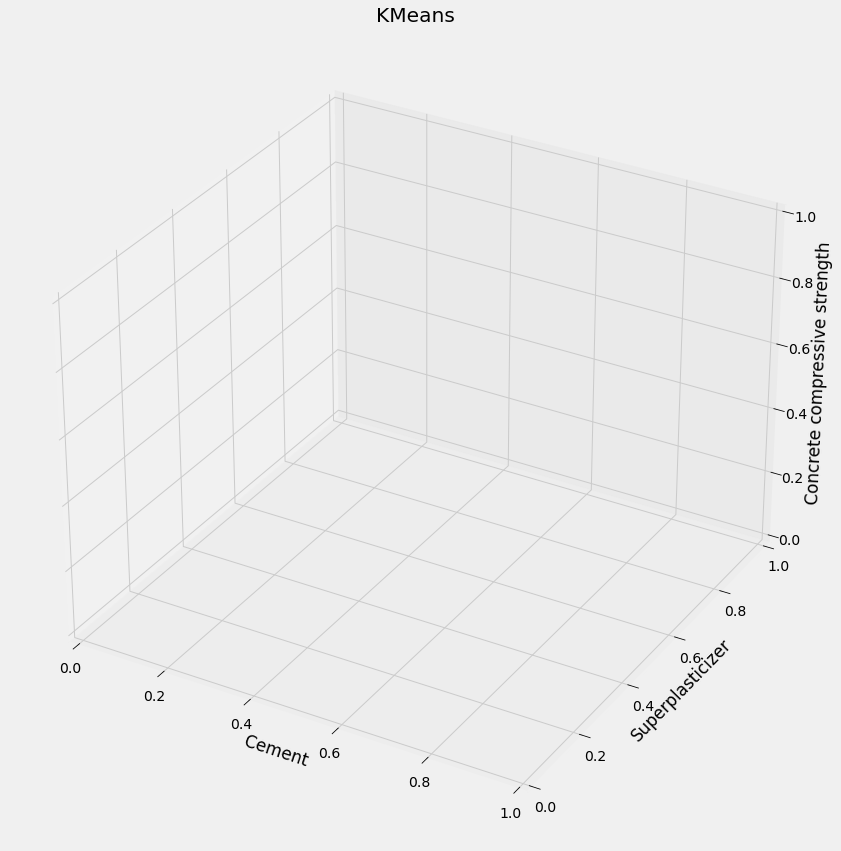

In [34]:
color_cluster = ['red', 'green', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'blue', 'magenta', 'black']
    
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.set_title('KMeans')
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)

sample_colors = [ color_cluster[kmeans_labels[i]] for i in range(len(kmeans_T)) ]
ax.scatter(kmeans_T[:, 0], kmeans_T[:, 1], kmeans_T[:, 2], c=sample_colors, marker='o', alpha=0.4)
ax.scatter(CC[:, 0], CC[:, 1], CC[:, 2], marker='.', s=169, linewidths=3, zorder=1000, c='black')

for i in range(len(CC)):
    ax.text(CC[i, 0], CC[i, 1], CC[i, 2], str(i), fontsize=16, color=color_cluster[i])

Jak na podstawie wizualizacji można zauważyć to mimo przeprowadzonej walidacji granice między klastrami są mało wyraźne i ciężko podjąć się precyzyjnego opisu poszczególnych zgrupowań z racji na efemeryczny charakter wyników.

In [35]:
gmm_components = len(X_cluster.columns)

gmm = GaussianMixture(n_components=gmm_components, covariance_type="full", random_state=23)
gmm.fit(X_cluster)

GaussianMixture(n_components=3, random_state=23)

In [36]:
print('Średnie dla komponentów:')
print(gmm.means_)
print('\nMacierz kowariancji:')
print(gmm.covariances_)
print('\nMacierz precyzji:')
print(gmm.precisions_)

Średnie dla komponentów:
[[294.618214     4.63264661  35.56097713]
 [433.79452559   9.38265035  48.65184372]
 [178.15320756   5.91657158  27.83302482]]

Macierz kowariancji:
[[[ 2.56303338e+03 -6.12981530e+01  1.30339349e+02]
  [-6.12981530e+01  2.26543607e+01  3.80408207e+01]
  [ 1.30339349e+02  3.80408207e+01  2.38198631e+02]]

 [[ 4.02172982e+03 -1.61449302e+02  2.56079031e+02]
  [-1.61449302e+02  7.08076369e+01  2.47093257e+01]
  [ 2.56079031e+02  2.47093257e+01  2.32200568e+02]]

 [[ 1.21375458e+03  6.50697118e-01  1.07951634e+02]
  [ 6.50697118e-01  2.24932185e+01  7.85913406e+00]
  [ 1.07951634e+02  7.85913406e+00  1.64016808e+02]]]

Macierz precyzji:
[[[ 0.00047961  0.00237543 -0.0006418 ]
  [ 0.00237543  0.07208177 -0.01281142]
  [-0.0006418  -0.01281142  0.00659537]]

 [[ 0.00031084  0.00086034 -0.00043436]
  [ 0.00086034  0.01704863 -0.00276302]
  [-0.00043436 -0.00276302  0.00507967]]

 [[ 0.00087583  0.00017907 -0.00058503]
  [ 0.00017907  0.04525145 -0.00228616]
  [-0.000

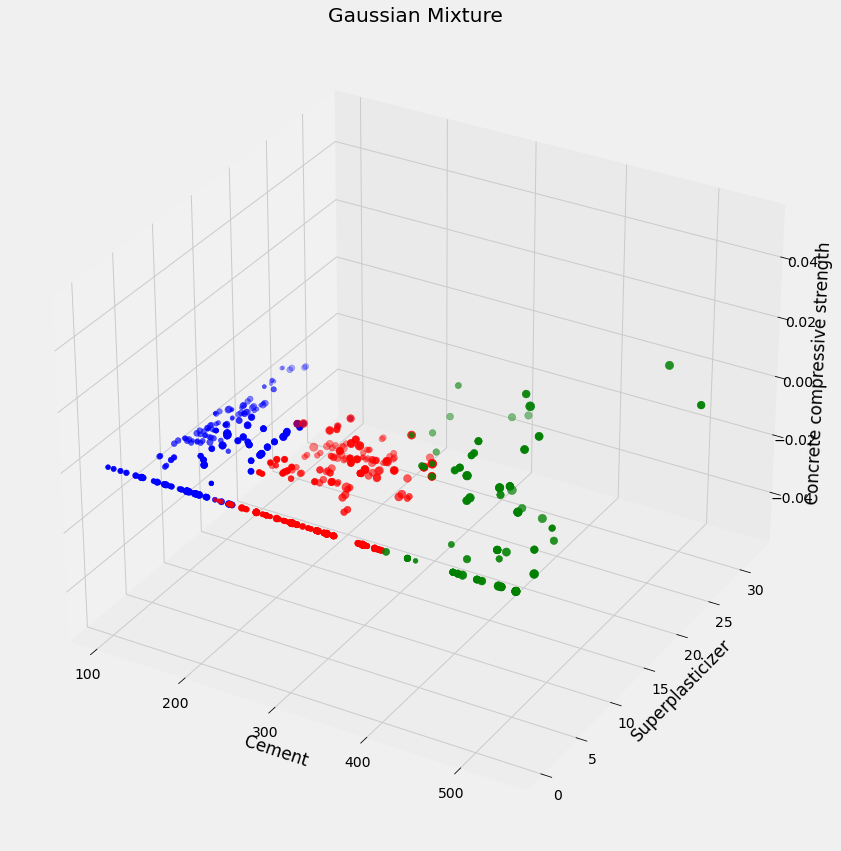

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

labels = gmm.predict(X_cluster)
frame = pd.DataFrame(X_cluster)
frame['cluster'] = labels
frame.columns = [feature_1, feature_2, feature_3, 'cluster']

for k in range(gmm_components):
    data = frame[frame['cluster']==k]
    plt.scatter(data[feature_1], data[feature_2], data[feature_3], c=color_cluster[k])

ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
ax.set_title("Gaussian Mixture")

plt.show()

Jak powyżej można zauważyć to na podstawie przeprowadzonego badania z wykorzystaniem Gaussian Mixture zmienne Cement i Superplasticizer pozwalają dokonać selekcji trzech jednoznacznie prezentujących się klastrów, grupujących się elipsoidalnie.
<ul>
   <li>Powyższa analiza skupień, zwłaszcza przeprowadzona z wykorzystaniem Gaussian Mixture, potwierdza hipotezę nr 1.</li>
</ul>

<h2>Artificial Neural Network (ANN)</h2>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn import preprocessing

In [39]:
min_max_scaler = preprocessing.StandardScaler()
#Bez walidacji
#X_scale = min_max_scaler.fit_transform(X)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(804, 8) (201, 8) (804,) (201,)


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#pobrać tensorflow optimalizator

In [92]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [93]:
hist = model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

Epoch 1/100
26/26 [==============================] - 0s 8ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.715

26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 49/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3363 - mean_squared_error: 1417.3363 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 50/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 51/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3363 - mean_squared_error: 1417.3363 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.7158 - val

26/26 [==============================] - 0s 2ms/step - loss: 1417.3363 - mean_squared_error: 1417.3363 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 96/100
26/26 [==============================] - 0s 3ms/step - loss: 1417.3365 - mean_squared_error: 1417.3365 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 97/100
26/26 [==============================] - 0s 3ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 98/100
26/26 [==============================] - 0s 3ms/step - loss: 1417.3363 - mean_squared_error: 1417.3363 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 99/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.7158 - val_mean_squared_error: 1520.7158
Epoch 100/100
26/26 [==============================] - 0s 2ms/step - loss: 1417.3364 - mean_squared_error: 1417.3364 - val_loss: 1520.7158 - va

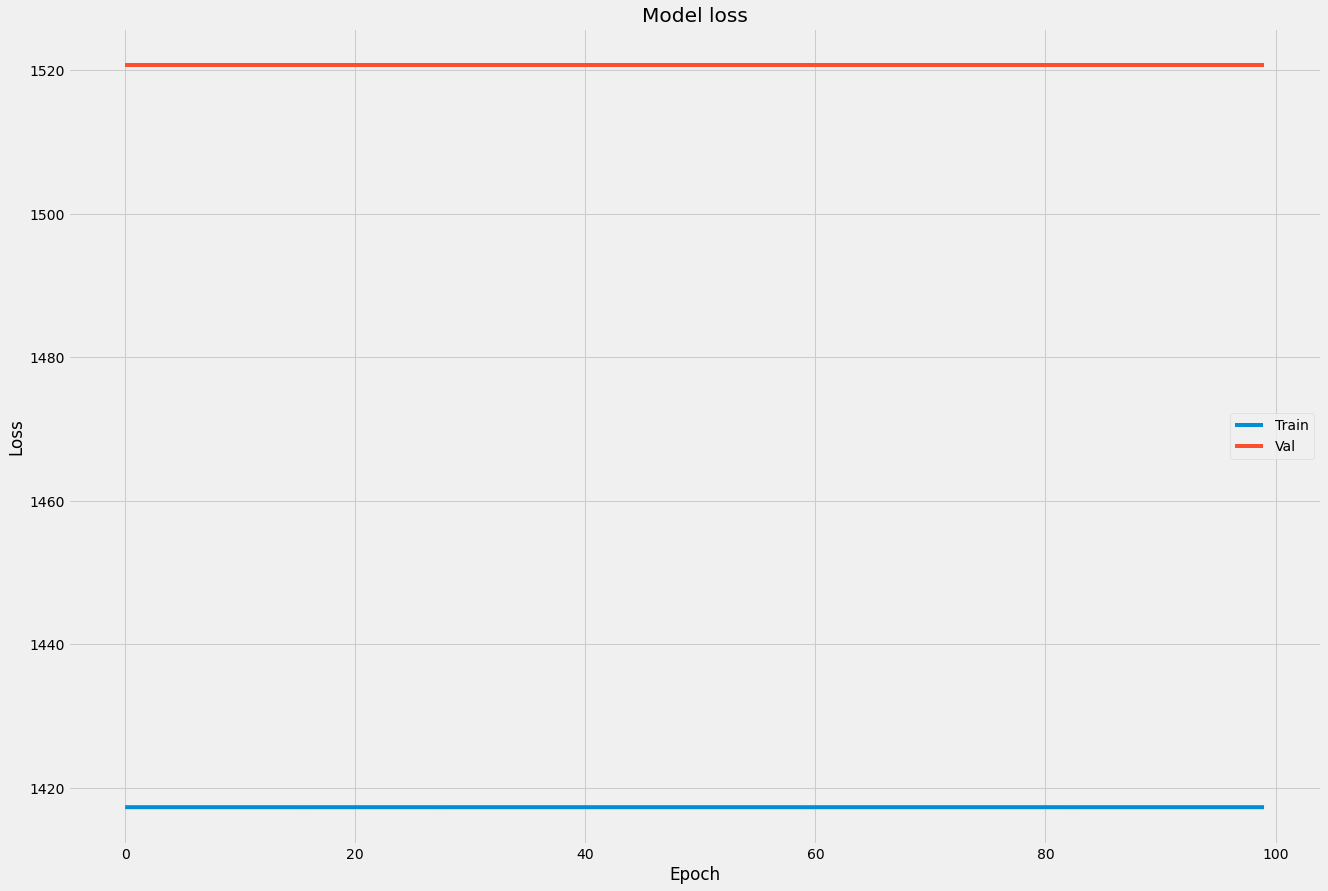

In [80]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [81]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

KeyError: 'acc'

<h2>Random Forest</h2>